# Network Optimization

### Introduction

The objective of this notebook is to detect communities in two networks:

i. The small Zachary Karate Club network with known community ground-truth

ii. The who-talks-to-whom network (underlying undirected graph where you put an edge if there is a directed link in either direction between two nodes)

### Methodology

I will calculate the community structure using the networkx girvan_newman algorithm and the Louvain community package (that finds best modularity partition via some fast heuristics).

Then, I will plot the communities obtained with different communities in different colors in order to get some valuable insights.

In [1]:
import community as community_louvain
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman
from networkx.algorithms.community import modularity
import itertools
import numpy as np
import pandas as pd

### i. Zachary Karate Club network

In [3]:
G = nx.read_edgelist("zachary_karate_club.txt", nodetype=int)

Community 1: [0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 22]
Community 2: [2, 8, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


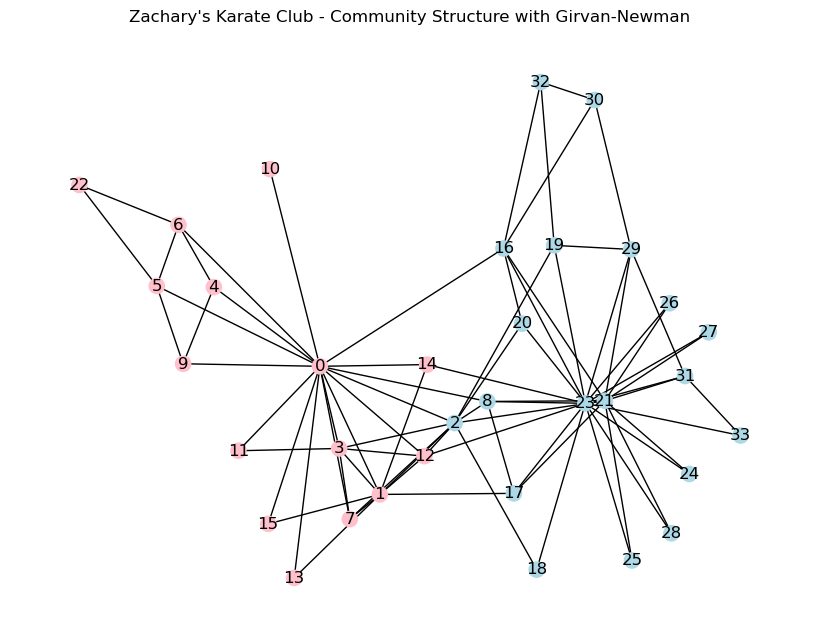

In [4]:
# Apply the Girvan-Newman algorithm to find a reasonable partition
communities_generator = girvan_newman(G)
# Advance communities generatorby one step, divide the nodes by removing the first batch of edges with the highest betweenness centrality 
top_level_communities = next(communities_generator)
sorted_communities = sorted(map(sorted, top_level_communities))

# Assign a community ID to each node (for coloring)
node_community_labels = {}
for i, community in enumerate(sorted_communities):
    for node in community:
        node_community_labels[node] = i

# To visualize or analyze the communities:
for i, community in enumerate(sorted_communities, start=1):
    print(f"Community {i}: {community}")
    
# Define colors
colors = ["pink", "lightblue", "lightgreen", "yellow"]
# Create a color map for nodes in different communities
community_colors = [colors[node_community_labels[node] % len(colors)] for node in G.nodes()]

# Plotting
plt.figure(figsize=(8, 6))
nx.draw_spring(G, node_color = community_colors, node_size=120, with_labels=True)
plt.title("Zachary's Karate Club - Community Structure with Girvan-Newman")
plt.axis('off')
plt.show()

In [5]:
mod = modularity(G, sorted_communities)
print("modularity:", mod)

modularity: 0.3599605522682445


Community 1: [0, 1, 3, 7, 10, 11, 12, 13, 14, 15]
Community 2: [2, 16, 19, 20, 30, 32]
Community 3: [4, 5, 6, 9, 22]
Community 4: [8, 17, 21, 23, 24, 25, 26, 27, 28, 29, 31, 33]
Community 5: [18]


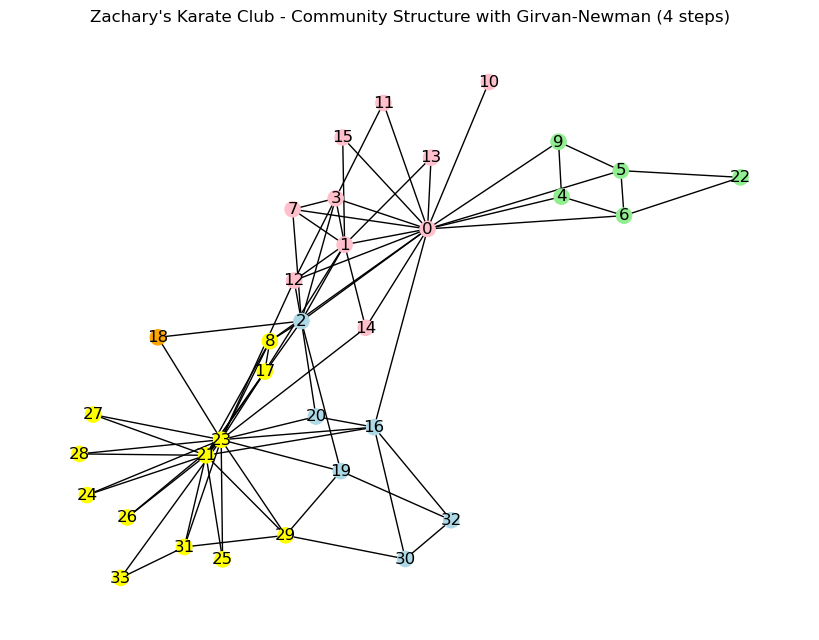

In [6]:
# Apply the Girvan-Newman algorithm to find a reasonable partition
communities_generator = girvan_newman(G)

# Advance the communities generator by four steps
for _ in range(4):
    try:
        top_level_communities = next(communities_generator)
    except StopIteration:
        break  # Stop if there are no more splits possible

sorted_communities = sorted(map(sorted, top_level_communities))

# Assign a community ID to each node (for coloring)
node_community_labels = {}
for i, community in enumerate(sorted_communities):
    for node in community:
        node_community_labels[node] = i

# To visualize or analyze the communities:
for i, community in enumerate(sorted_communities, start=1):
    print(f"Community {i}: {community}")
    
# Define colors
colors = ["pink", "lightblue", "lightgreen", "yellow", 'orange']
# Create a color map for nodes in different communities
community_colors = [colors[node_community_labels[node] % len(colors)] for node in G.nodes()]

# Plotting
plt.figure(figsize=(8, 6))
nx.draw_spring(G, node_color = community_colors, node_size=120, with_labels=True)
plt.title("Zachary's Karate Club - Community Structure with Girvan-Newman (4 steps)")
plt.axis('off')
plt.show()

In [7]:
mod = modularity(G, sorted_communities)
print("modularity:", mod)

modularity: 0.40129848783694944


Community 1: [0, 1, 2, 3, 7, 10, 11, 12, 13, 14, 15]
Community 2: [4, 5, 6, 9, 22]
Community 4: [8, 17, 18, 21, 23, 24, 25, 26, 27, 28, 31, 33]
Community 3: [16, 19, 20, 29, 30, 32]


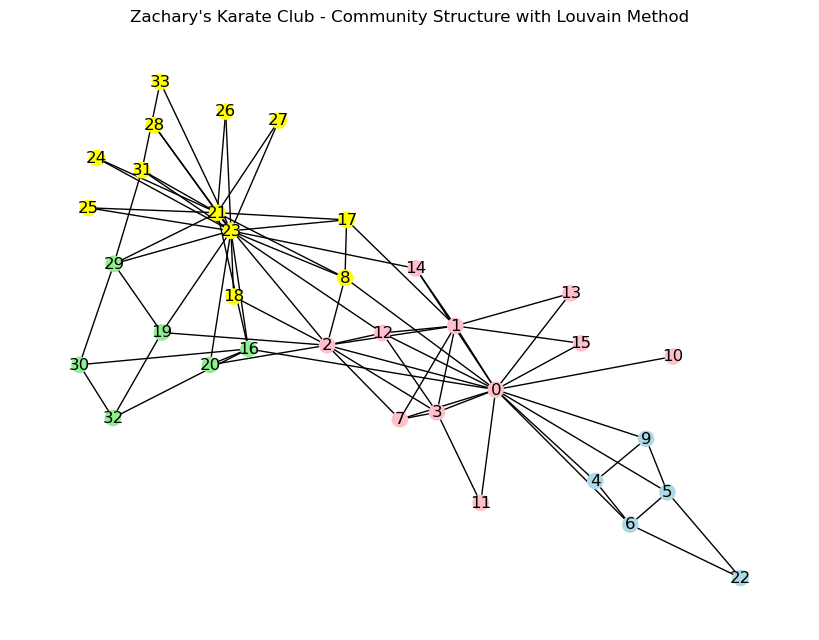

In [8]:
# Apply the Louvain community method to find the best partition
partition = community_louvain.best_partition(G)
# 'partition' is a dictionary where the keys are node IDs and the values are their respective community assignments

# Show the communities and the grouped nodes
community_dict = defaultdict(list)
for node, comm in partition.items():
    community_dict[comm].append(node)

for comm, nodes in community_dict.items():
    print(f"Community {comm+1}: {nodes}")

# Define colors
colors = ["pink", "lightblue", "lightgreen", "yellow"]
# Create a color map for nodes in different communities
community_colors = [colors[partition[node] % len(colors)] for node in G.nodes()]

# Plotting
plt.figure(figsize=(8, 6))
nx.draw_spring(G, node_color = community_colors, node_size=120, with_labels=True)
plt.title("Zachary's Karate Club - Community Structure with Louvain Method")
plt.axis('off')
plt.show()

In [9]:
mod = community_louvain.modularity(partition,G)
print("modularity:", mod)

modularity: 0.41978961209730437


### ii. Who-talks-to-whom Network

In [10]:
# Load the data and fix errors
link = "who_talks_to_whom.xlsx"
sent_emails = pd.read_excel(link, sheet_name='Sent', index_col=0).fillna(0).apply(pd.to_numeric, errors='coerce')
received_emails = pd.read_excel(link, sheet_name='Received', index_col=0).fillna(0).apply(pd.to_numeric, errors='coerce')

df = sent_emails.copy()

# For each combination of row and column, I retrieve the values from the corresponding positions in both sent_emails and received_emails dataframes
for row in sent_emails.index:
    for column in sent_emails.columns:
        value_sent_file = sent_emails.loc[row, column]
        value_received_file = received_emails.loc[row, column]
        higher_value = max(value_sent_file, value_received_file) # keep higher vale
        # Update the corresponding position in the new dataframe with the calculated higher value
        df.loc[row, column] = higher_value
df

,1,2,3,4,5,6,7,8,9,10,...,72,73,74,75,76,77,78,79,80,81
Nodes,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,5.0,1.0,1.0,5.0,2.0
2,2.0,0.0,0.0,1.0,3.0,0.0,5.0,0.0,0.0,0.0,...,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,7.0,0.0,...,5.0,0.0,0.0,0.0,3.0,0.0,11.0,2.0,2.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,1.0,5.0,1.0,0.0,0.0,3.0,0.0,1.0
5,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,2.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
78,4.0,0.0,5.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,...,20.0,1.0,0.0,0.0,3.0,2.0,0.0,3.0,1.0,1.0
79,0.0,0.0,0.0,8.0,0.0,0.0,1.0,0.0,3.0,0.0,...,0.0,2.0,0.0,0.0,1.0,0.0,3.0,0.0,3.0,2.0


We assume that people tend to underestimate the number of emails they sent or received, as it is more likely that people forget to check the email replies or spam, and less likely to over-count the emails. Therefore, when select the larger number when there are discrepencies in send_emails and receive_emails.

**For the first version, we create an adjacency matrix and edge list based on this undirected unweighted graph. The matrix is symmetric.**

In [11]:
# Create a boolean matrix indicating whether there's communication
communication_matrix = (df > 0).astype(int) | (df.T > 0).astype(int)

# Ensure the matrix is symmetric
adj_m = communication_matrix.astype(int)

#denote a edge (relationship) among the email recipient and sender
#we don't care about who is the recipient and who is the sender, as long as there's one or more email, we mark edge = 1, otherwise edge = 0 
adj_m 

,1,2,3,4,5,6,7,8,9,10,...,72,73,74,75,76,77,78,79,80,81
Nodes,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,1,1,1,1
2,1,0,0,1,1,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,1,0,...,1,0,0,0,1,0,1,1,1,1
4,0,1,1,0,1,0,0,0,1,1,...,1,1,1,1,1,0,1,1,1,1
5,0,1,0,1,0,0,1,0,0,0,...,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
78,1,0,1,1,0,1,0,0,1,0,...,1,1,0,0,1,1,0,1,1,1
79,1,0,1,1,0,0,1,0,1,0,...,0,1,0,1,1,0,1,0,1,1


In [12]:
edge_list = []
for i in range(1, adj_m.shape[0]+1):
    for j in range(1, adj_m.shape[1]+1):
        if adj_m[i][j] == 1:
            if [j, i] not in edge_list:
                edge_list.append([i, j])
edge_list

[[1, 2],
 [1, 8],
 [1, 11],
 [1, 13],
 [1, 14],
 [1, 17],
 [1, 18],
 [1, 22],
 [1, 25],
 [1, 27],
 [1, 33],
 [1, 36],
 [1, 40],
 [1, 41],
 [1, 42],
 [1, 47],
 [1, 49],
 [1, 50],
 [1, 52],
 [1, 55],
 [1, 57],
 [1, 64],
 [1, 75],
 [1, 77],
 [1, 78],
 [1, 79],
 [1, 80],
 [1, 81],
 [2, 4],
 [2, 5],
 [2, 7],
 [2, 12],
 [2, 19],
 [2, 24],
 [2, 25],
 [2, 26],
 [2, 27],
 [2, 28],
 [2, 29],
 [2, 32],
 [2, 35],
 [2, 36],
 [2, 37],
 [2, 38],
 [2, 39],
 [2, 42],
 [2, 46],
 [2, 48],
 [2, 53],
 [2, 58],
 [2, 60],
 [2, 61],
 [2, 68],
 [2, 69],
 [2, 73],
 [2, 74],
 [3, 4],
 [3, 6],
 [3, 9],
 [3, 11],
 [3, 14],
 [3, 16],
 [3, 17],
 [3, 18],
 [3, 21],
 [3, 22],
 [3, 26],
 [3, 31],
 [3, 36],
 [3, 40],
 [3, 41],
 [3, 44],
 [3, 45],
 [3, 47],
 [3, 50],
 [3, 51],
 [3, 52],
 [3, 53],
 [3, 54],
 [3, 56],
 [3, 57],
 [3, 59],
 [3, 60],
 [3, 62],
 [3, 63],
 [3, 64],
 [3, 67],
 [3, 71],
 [3, 72],
 [3, 76],
 [3, 78],
 [3, 79],
 [3, 80],
 [3, 81],
 [4, 5],
 [4, 9],
 [4, 10],
 [4, 13],
 [4, 14],
 [4, 15],
 [4, 17],


In [13]:
G = nx.Graph()  # Create an empty graph
G.add_edges_from(edge_list)  # Add edges to the graph
G.remove_edges_from(nx.selfloop_edges(G))# Remove self-loops

**For the second version, we include the weight on edges:**

In [15]:
# Get the list of nodes
nodes = df.index.tolist()

# Create a list to store edges
edges_list2 = []

# Iterate through the matrix and add edges to the list
for i in range(len(nodes)):
    for j in range(i + 1, len(nodes)):
        if received_emails.iloc[i, j] != 0:
            edges_list2.append({'nodeA': nodes[i], 'nodeB': nodes[j], 'weight': received_emails.iloc[i, j]})

# Create a DataFrame from the list of weighted edges
df2 = pd.DataFrame(edges_list2, columns=['nodeA', 'nodeB', 'weight'])

# Write the DataFrame to a new text file
df2.to_csv('class_data.txt', sep=' ', header=False, index=False)

df2

,nodeA,nodeB,weight
0,1,13,1.0
1,1,14,5.0
2,1,18,2.0
3,1,22,3.0
4,1,25,2.0
...,...,...,...
1016,76,80,10.0
1017,77,78,1.0
1018,78,79,3.0
1019,79,80,2.0


In [16]:
G1 = nx.Graph()
# Read an un-directed graph from a list of edges
G1 = nx.read_edgelist('class_data.txt', nodetype=str, data=[('weight', float)])

# Now, if you want to convert the weights to integers, you can do it separately
# Note: This will round down the float weights to integers
for edge in G1.edges(data=True):
    edge[2]['weight'] = int(edge[2]['weight'])

# Print the graph to verify
print(G1.edges(data=True))

[('1', '13', {'weight': 1}), ('1', '14', {'weight': 5}), ('1', '18', {'weight': 2}), ('1', '22', {'weight': 3}), ('1', '25', {'weight': 2}), ('1', '33', {'weight': 20}), ('1', '36', {'weight': 2}), ('1', '40', {'weight': 2}), ('1', '41', {'weight': 2}), ('1', '42', {'weight': 5}), ('1', '47', {'weight': 1}), ('1', '49', {'weight': 18}), ('1', '50', {'weight': 2}), ('1', '52', {'weight': 2}), ('1', '55', {'weight': 3}), ('1', '57', {'weight': 5}), ('1', '64', {'weight': 3}), ('1', '75', {'weight': 1}), ('1', '77', {'weight': 5}), ('1', '78', {'weight': 1}), ('1', '79', {'weight': 1}), ('1', '80', {'weight': 5}), ('1', '81', {'weight': 2}), ('13', '7', {'weight': 1}), ('13', '11', {'weight': 3}), ('13', '14', {'weight': 1}), ('13', '17', {'weight': 3}), ('13', '18', {'weight': 2}), ('13', '21', {'weight': 3}), ('13', '22', {'weight': 3}), ('13', '31', {'weight': 3}), ('13', '36', {'weight': 12}), ('13', '40', {'weight': 7}), ('13', '41', {'weight': 2}), ('13', '44', {'weight': 1}), ('13'

Community 1: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]
Community 2: [16]


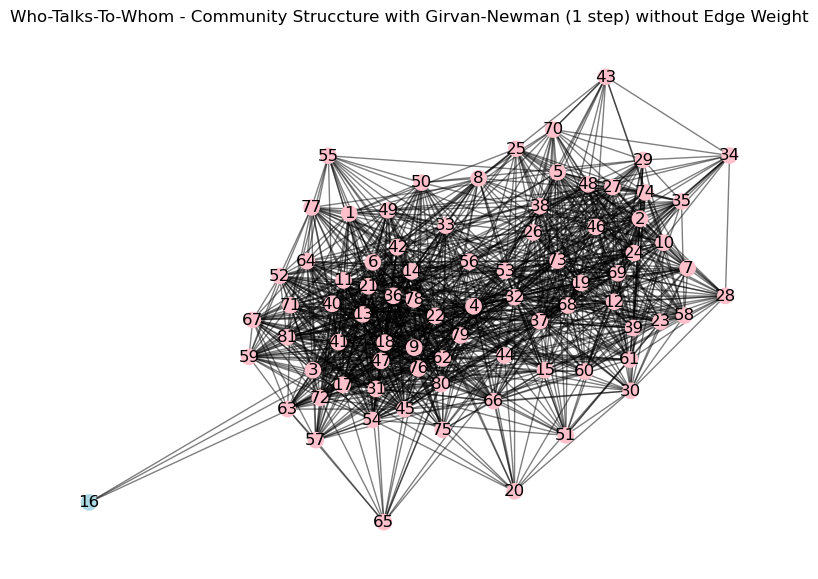

In [22]:
# Apply the Girvan-Newman algorithm to find a reasonable partition
communities_generator = girvan_newman(G)
# advance communities generatorby one step, divide the nodes by removing the first batch of edges with the highest betweenness centrality 
top_level_communities = next(communities_generator)
sorted_communities = sorted(map(sorted, top_level_communities))

# Assign a community ID to each node (for coloring)
node_community_labels = {}
for i, community in enumerate(sorted_communities):
    for node in community:
        node_community_labels[node] = i

# To visualize or analyze the communities:
for i, community in enumerate(sorted_communities, start=1):
    print(f"Community {i}: {community}")

# Define specific colors for each community
colors = ["pink", "lightblue", "lightgreen", "yellow"]
community_colors = [colors[node_community_labels[node] % len(colors)] for node in G.nodes()]

# Plotting
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G)  # positions for all nodes

nx.draw_networkx_nodes(G, pos, node_color=community_colors, node_size=120)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

plt.title("Who-Talks-To-Whom - Community Struccture with Girvan-Newman (1 step) without Edge Weight")
plt.axis('off')
plt.show()

In [23]:
mod = modularity(G, sorted_communities)
print("modularity:", mod)

modularity: -2.6709338297882327e-06


Community 1: [1, 3, 4, 6, 8, 9, 11, 13, 14, 15, 17, 18, 20, 21, 22, 31, 32, 33, 36, 37, 40, 41, 42, 44, 45, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 62, 63, 64, 65, 66, 67, 68, 71, 72, 75, 76, 77, 78, 79, 80, 81]
Community 2: [2, 5, 7, 10, 12, 19, 23, 24, 25, 26, 27, 28, 29, 30, 35, 38, 39, 46, 48, 58, 60, 61, 69, 70, 73, 74]
Community 3: [16]
Community 4: [34]
Community 5: [43]


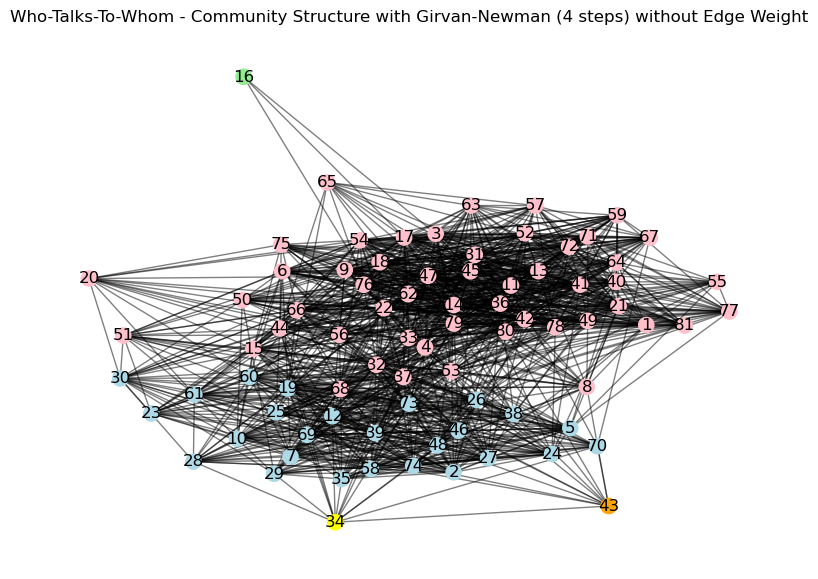

In [24]:
# Apply the Girvan-Newman algorithm to find a reasonable partition
communities_generator = girvan_newman(G)

# Advance the communities generator by four steps
for _ in range(4):
    try:
        top_level_communities = next(communities_generator)
    except StopIteration:
        break  # Stop if there are no more splits possible

sorted_communities = sorted(map(sorted, top_level_communities))

# Assign a community ID to each node (for coloring)
node_community_labels = {}
for i, community in enumerate(sorted_communities):
    for node in community:
        node_community_labels[node] = i

# To visualize or analyze the communities:
for i, community in enumerate(sorted_communities, start=1):
    print(f"Community {i}: {community}")

# Define specific colors for each community
colors = ["pink", "lightblue", "lightgreen", "yellow", 'orange', 'gray']
community_colors = [colors[node_community_labels[node] % len(colors)] for node in G.nodes()]

# Plotting
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G)  # Calculate positions for all nodes

nx.draw_networkx_nodes(G, pos, node_color=community_colors, node_size=120)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

plt.title("Who-Talks-To-Whom - Community Structure with Girvan-Newman (4 steps) without Edge Weight")
plt.axis('off')
plt.show()

In [25]:
mod = modularity(G, sorted_communities)
print("modularity:", mod)

modularity: 0.2051630338009643


Community 2: [1, 8, 11, 13, 14, 17, 18, 22, 33, 36, 40, 41, 42, 47, 49, 50, 52, 55, 57, 64, 77, 78, 79, 80, 81, 3, 6, 9, 16, 21, 31, 45, 54, 59, 62, 63, 67, 71, 72, 76, 65]
Community 3: [2, 25, 27, 5, 7, 12, 19, 24, 26, 28, 29, 32, 35, 37, 38, 39, 46, 48, 53, 58, 60, 61, 68, 69, 73, 74, 51, 10, 23, 30, 43, 70, 34]
Community 1: [75, 4, 44, 56, 15, 20, 66]


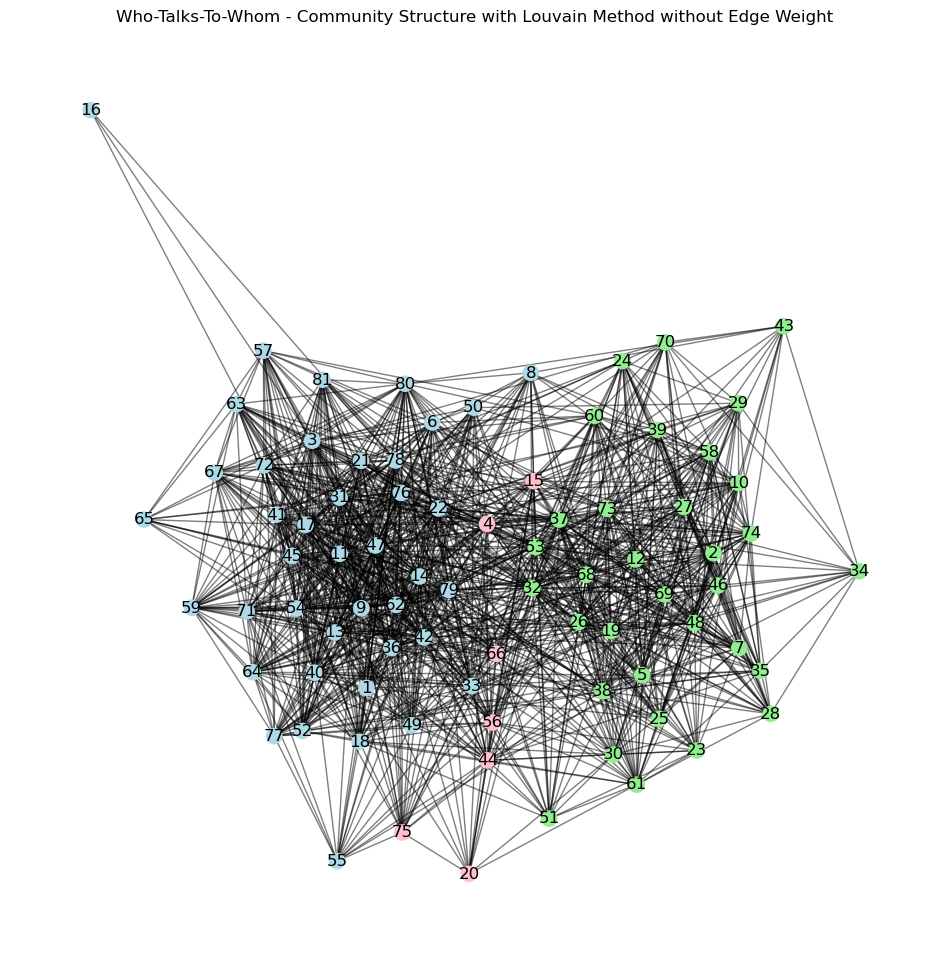

In [26]:
# Apply the Louvain community method to find the best partition
partition = community_louvain.best_partition(G)
# 'partition' is a dictionary where the keys are node IDs and the values are their respective community assignments

# Show the communities and the grouped nodes
community_dict = defaultdict(list)
for node, comm in partition.items():
    community_dict[comm].append(node)

for comm, nodes in community_dict.items():
    print(f"Community {comm+1}: {nodes}")
    
# Define a colors
colors = ["pink", "lightblue", "lightgreen", "yellow"]

# Create a color map for nodes in different communities
community_colors = [colors[partition[node] % len(colors)] for node in G.nodes()]

# Plotting
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)  # positions for all nodes

nx.draw_networkx_nodes(G, pos, nodelist=list(G.nodes()), node_color=community_colors, node_size=120)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

plt.title("Who-Talks-To-Whom - Community Structure with Louvain Method without Edge Weight")
plt.axis('off')
plt.show()

In [27]:
mod = community_louvain.modularity(partition,G)
print("modularity:", mod)

modularity: 0.2792066614276795


Community 1: ['1', '10', '11', '12', '13', '14', '15', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '9']
Community 2: ['16']


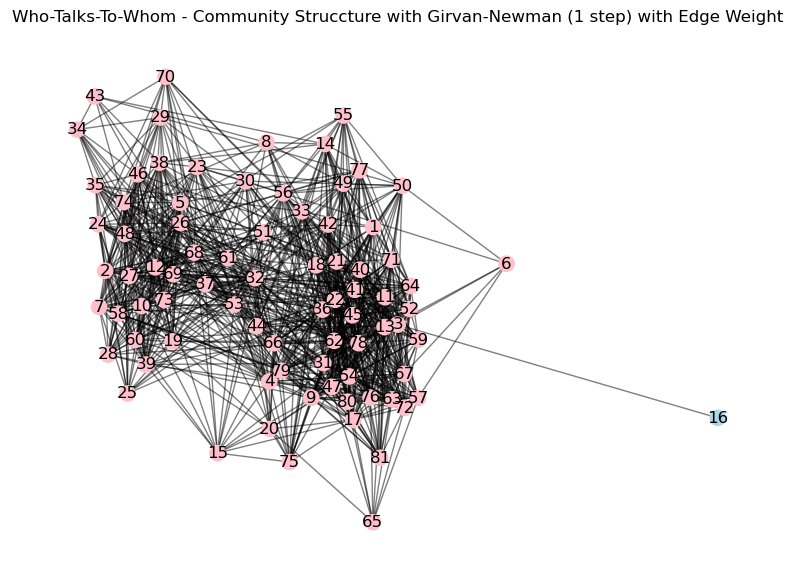

In [28]:
# Apply the Girvan-Newman algorithm to find a reasonable partition
communities_generator = girvan_newman(G1) #input the weighted edge list
# advance communities generatorby one step, divide the nodes by removing the first batch of edges with the highest betweenness centrality 
top_level_communities = next(communities_generator)
sorted_communities = sorted(map(sorted, top_level_communities))

# Assign a community ID to each node (for coloring)
node_community_labels = {}
for i, community in enumerate(sorted_communities):
    for node in community:
        node_community_labels[node] = i

# To visualize or analyze the communities:
for i, community in enumerate(sorted_communities, start=1):
    print(f"Community {i}: {community}")

# Define specific colors for each community
colors = ["pink", "lightblue", "lightgreen", "yellow"]
community_colors = [colors[node_community_labels[node] % len(colors)] for node in G1.nodes()]

# Plotting
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G1)  # positions for all nodes

nx.draw_networkx_nodes(G1, pos, node_color=community_colors, node_size=120)
nx.draw_networkx_edges(G1, pos, alpha=0.5)
nx.draw_networkx_labels(G1, pos, font_size=12, font_family="sans-serif")

plt.title("Who-Talks-To-Whom - Community Struccture with Girvan-Newman (1 step) with Edge Weight")
plt.axis('off')
plt.show()

In [29]:
mod = modularity(G1, sorted_communities)
print("modularity:", mod)

modularity: -8.350299756735312e-08


Community 1: ['1', '10', '11', '12', '13', '14', '15', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '35', '36', '37', '38', '39', '4', '40', '41', '42', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '9']
Community 2: ['16']
Community 3: ['34']
Community 4: ['43']
Community 5: ['6']


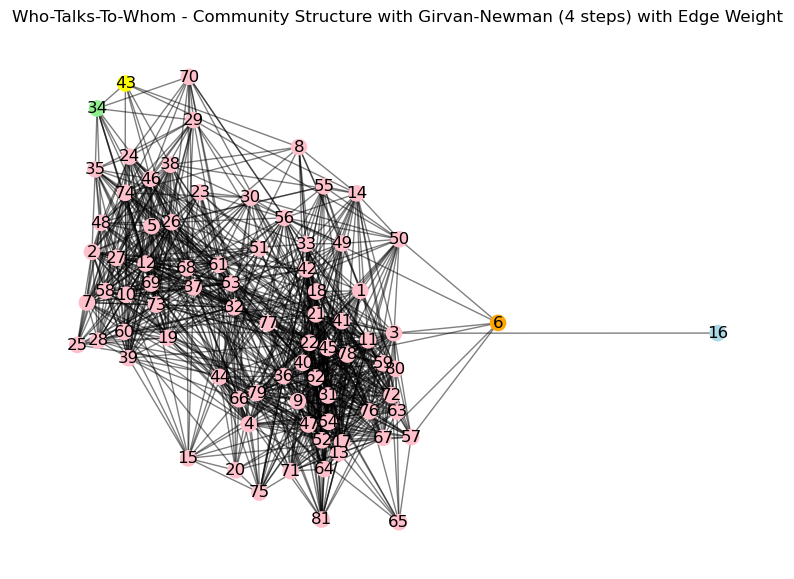

In [30]:
# Apply the Girvan-Newman algorithm to find a reasonable partition
communities_generator = girvan_newman(G1)

# Advance the communities generator by four steps
for _ in range(4):
    try:
        top_level_communities = next(communities_generator)
    except StopIteration:
        break  # Stop if there are no more splits possible

sorted_communities = sorted(map(sorted, top_level_communities))

# Assign a community ID to each node (for coloring)
node_community_labels = {}
for i, community in enumerate(sorted_communities):
    for node in community:
        node_community_labels[node] = i

# To visualize or analyze the communities:
for i, community in enumerate(sorted_communities, start=1):
    print(f"Community {i}: {community}")

# Define specific colors for each community
colors = ["pink", "lightblue", "lightgreen", "yellow", 'orange', 'gray']
community_colors = [colors[node_community_labels[node] % len(colors)] for node in G1.nodes()]

# Plotting
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G1)  # Calculate positions for all nodes

nx.draw_networkx_nodes(G1, pos, node_color=community_colors, node_size=120)
nx.draw_networkx_edges(G1, pos, alpha=0.5)
nx.draw_networkx_labels(G1, pos, font_size=12, font_family="sans-serif")

plt.title("Who-Talks-To-Whom - Community Structure with Girvan-Newman (4 steps) with Edge Weight")
plt.axis('off')
plt.show()

In [31]:
mod = modularity(G1, sorted_communities)
print("modularity:", mod)

modularity: 0.006502107031136057


Community 1: ['1', '14', '33', '42', '49', '50', '55', '8']
Community 6: ['13', '40', '47', '52', '57', '64', '75', '77', '79', '80', '81', '4', '6', '9', '17', '31', '54', '62', '67', '76', '15', '20', '44', '66', '71', '65']
Community 3: ['18', '61', '21', '51', '56', '30']
Community 4: ['22', '36', '41', '32', '45']
Community 5: ['25', '2', '5', '7', '12', '19', '24', '26', '27', '28', '35', '37', '38', '39', '48', '53', '58', '60', '68', '69', '73', '74', '10', '23']
Community 7: ['78', '3', '11', '16', '59', '63', '72']
Community 2: ['29', '46', '43', '70', '34']


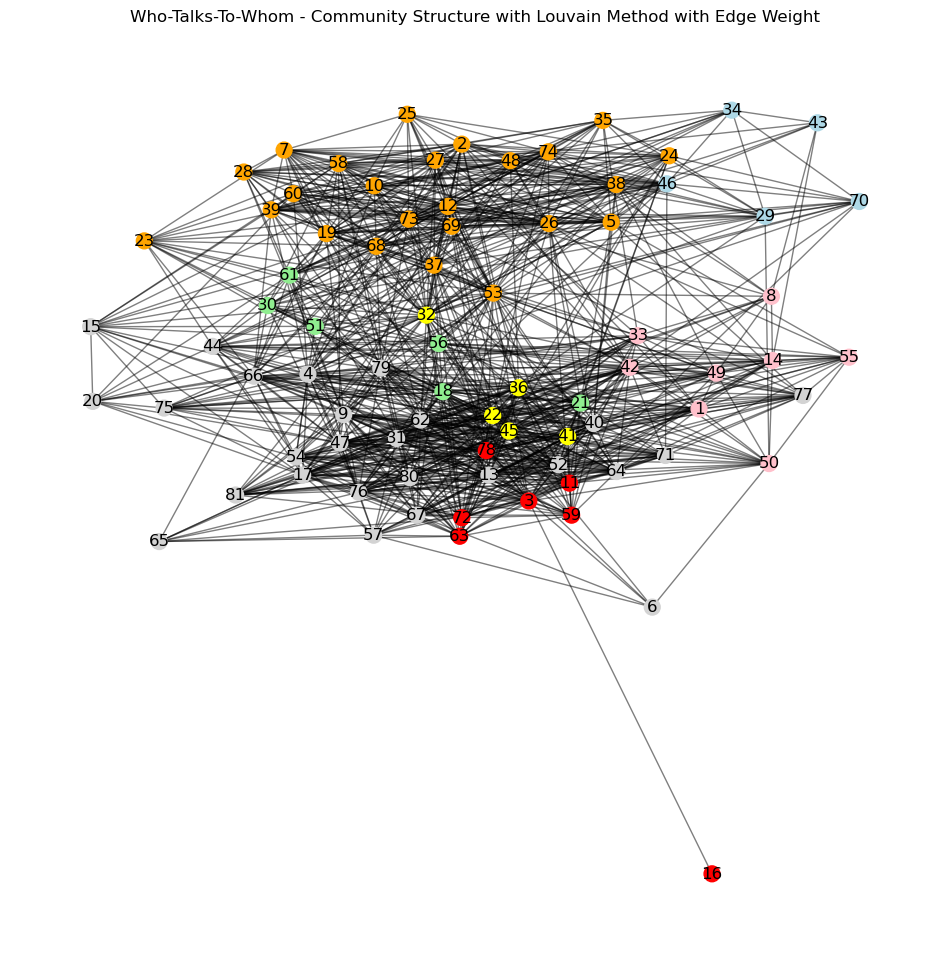

In [32]:
# Apply the Louvain community method to find the best partition
partition = community_louvain.best_partition(G1)
# 'partition' is a dictionary where the keys are node IDs and the values are their respective community assignments

# Show the communities and the grouped nodes
community_dict = defaultdict(list)
for node, comm in partition.items():
    community_dict[comm].append(node)

for comm, nodes in community_dict.items():
    print(f"Community {comm+1}: {nodes}")
    
# Define a colors
colors = ["pink", "lightblue", "lightgreen", "yellow", 'orange', 'lightgray', 'red']

# Create a color map for nodes in different communities
community_colors = [colors[partition[node] % len(colors)] for node in G1.nodes()]

# Plotting
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G1)  # positions for all nodes

nx.draw_networkx_nodes(G1, pos, nodelist=list(G1.nodes()), node_color=community_colors, node_size=130)
nx.draw_networkx_edges(G1, pos, alpha=0.5)
nx.draw_networkx_labels(G1, pos, font_size=12, font_family="sans-serif")

plt.title("Who-Talks-To-Whom - Community Structure with Louvain Method with Edge Weight")
plt.axis('off')
plt.show()

In [33]:
mod = community_louvain.modularity(partition,G1)
print("modularity:", mod)

modularity: 0.46242955895887794


Modularity typically ranges from ‐1 to 1. It is positive if the number of edges in the network is more than the expected number. A modularity score close to indicates a strong network. In contrast, a negative modularity suggests a network that is not well-defined or is less meaningful than a random graph. If the modularity is very different from 0, it is suggested that the network is far from a random case.

It is possible to get the different modularity score when analysing the same graph with different method (e.g. Girvan-Newman or Louvain). The two method lead to different partitions, correspondning to differences in the last term of the formula δ(ci, cj). δ = 1 when node i, j is in the same community, δ=0 otherwise.

![Network Graph](image.png)

### Report & insights

**Part A: Possible reasons for the differences in the two communities detected by the two algorithms**

For the Zachary Karate Club network, we have two communities with 15 and 19 nodes respectively when applying the Girven-Newman algorithm for one step. The modularity score is 0.36. We have four communities with 11, 5, 4, 14 nodes respectively when applying the Louvain method. The modularity score is 0.42.

For the who-talks-to-whom network without edge weight, we have two communities with 80 and 1 node respectively when applying the Girven-Newman algorithm by one step. The modularity score is –2.67. If applying the Girven-Newman algorithm in four steps, we get five communities with 52, 26, 1, 1, 1 node respectively. The modularity score is 0.21. We have three communities with 42, 33, 6 nodes respectively when applying the Louvain method. The modularity score is 0.28.

For the who-talks-to-whom network with edge weight, we have again two communities with 80 and 1 node respectively when applying the Girven-Newman algorithm by one step. The modularity score is negative but close to 0. If applying the Girven-Newman algorithm in four steps, we get five communities. One community has 77 nodes, and the other four communities have only one node each. The modularity score is 0.0065. We have seven communities with 26, 24, 8, 7, 6, 5, and 5 nodes respectively when applying the Louvain method. The modularity score is 0.46.

The Girvan-Newman method and Louvain method relies on different formulas to make partitions and stop making partitions as well as different approaches to explore the network. This could be the reason why the resulting communities differ when using Girvan-Newman method and Louvain method or advancing the Girvan-Newman method in different steps.

The Girvan-Newman algorithm is a hierarchical method for community detection in networks. It focuses on the concept of edge betweenness centrality, which measures the number of shortest paths that pass through an edge. The formula of betweenness centrality of edge (s,t) is:

$$CB(e_{a,b}) = \sum_{s,t \in V} \frac{\sigma(s,t|e_{a,b})}{\sigma(s,t)}$$ where $σ(e_{a,b})$ is number of shortest paths between nodes s and t, and ${\sigma(s,t|e_{a,b})}$ is the number of shortest paths between nodes s and t that pass-through edge (a,b).

Assume an undirected graph G = {V, E}, where V refers to vertexes and E refers to edges.

The algorithm iteratively removes edges with the highest betweenness centrality, with the idea that these edges are more likely to be the bridges between communities. As edges are removed, the network eventually splits into disconnected components, each identified as a community. This process continues recursively, allowing the detection of a hierarchical structure of communities.

The Louvain method is a greedy optimization method that seeks to maximize the modularity of a partition of the network. Modularity typically ranges from -1 to 1, and a larger modularity suggests the graph is more different from a random graph. The formula of modularity is:

$$
Q(C) = \frac{1}{4m} \sum_{i,j} (A_{ij} - E_{ij}) \delta(C_i, C_j)
$$

where C is a partition that divides the graph into k communities, C = C1, C2, …., Ck.

m is the number edges in the graph,

$A_{ij}$ is 1 if there is an an edge (i,j) in adjacency matrix A,

$E_{ij}$ is the expected number of edges between i and j,

$delta(C_i, C_j)$= 1 if i and j are in the same community C, and 0 otherwise.

The algorithm works in two phases that are repeated iteratively: first, it selects a targeted node and compares the modularity of the nodes with all its neighbors. The pair that yields the smallest modularity is grouped locally. It moves on another nodes and applies the same strategy until all the nodes are covered in the first iteration. Then in the next iteration, each small community is aggregated into one node if a higher modularity score can be achieved, and the first step is repeated. This method is known for its speed and ability to handle large networks efficiently.

The reasons for different community partition can be explained with the following aspects:

_Granularity limit:_ The Girvan-Newman algorithm does not have an explicit granularity limit, meaning it does not impose a cap in terms of how small the community can be. The algorithm can create small communities by iteratively removing edges, even until there are only a few nodes in each community. That is why we need to specify how many steps (iteration / number of partitions) we would like to attain when running the algorithm. In contrast, the Louvain method has a known granularity limit due to its modularity optimization approach, which may merge small communities into larger ones if doing so increases the overall modularity.

_Optimization Strategy:_ The Girvan-Newman algorithm is based on a top-down approach, removing edges to find divisions within the network. In contrast, the Louvain method is a bottom-up approach, starting with individual nodes and merging them into communities. This difference in approach can lead to varying community structures, especially in networks with complex or overlapping community structures.

_Hierarchical vs. Non-Hierarchical:_ The Girvan-Newman algorithm produces a hierarchical decomposition of the network, since we are comparing betweenness centrality of the edges in each round of iteration. The steps (iterations) follow an order. As we make more steps (iterations), the decomposition goes deeper, and the network is divided into more communities. The approach can reveal community structures at different scales. The Louvain method, while it can be applied iteratively to explore hierarchical structures, primarily focuses on a single partitioning that maximizes modularity.

_Sensitivity to Network Structure:_ The Girvan-Newman algorithm's reliance on edge betweenness makes it sensitive to the network's global structure, potentially leading to different community detection in networks with closely interconnected communities. The Louvain method, by optimizing modularity, might be more robust in detecting communities in such networks but can also merge smaller communities into larger ones to achieve higher modularity.

**Part B: Possible explanation and insight into the communities based on the two algorithms**

When comparing the two networks, the Zachary Karate Club network has higher modularity than who-talks-to-whom network, regardless of which algorithm is used. This suggests that the Zachary Karate Club network contains more obvious subgroups within the network. While in the who-talks-to-whom network, most nodes have many edges, and the entire graph seems strongly connected.

When comparing weighted and unweighted edges of the whom-talks-to-whom network, the inclusion of edge weight appears to complex the community detection in both methods. There are more resulting communities under Louvain method and four-step Girven-Newman method. In particular, the community detection of four-step Girven-Newman method is less ideal when accounting for edge weight. The reasons are that it contains many communities with only one node, and that the modularity score is close to zero, suggesting the graph doesn’t differ much from a random graph.

When comparing the community detection methods with the same network, in both network examples, it is found that communities detected by Louvain are more similar in size, while the ones detected by Girvan-Newman vary widely in sized E.g. the results are often a large community and a few small communities containing only one node. The phenomenon is more pronounced in the who-talks-to-whom graph. From our perspective, the Louvain method yields a more reasonable result because it is less meaningful to look into communities that differ too much in sizes. In reality, we would not consider a community with only one node as a community, but rather assign the node to the closest community. This is consistent with the explanations in (i): the Girven-Newman method is sensitive to network’s global structure, leading to different community detection especially when analyzing networks with strongly interconnected communities. By imposing more steps (higher hierarchy) in the algorithm, we cut the edges with the highest betweenness centrality even when the numbers of nodes on each side are vastly different. The approach potentially creates communities uneven in sizes, which is less meaningful. In contrast, the Louvian method works well for all graphs. It is capable of identifying strongly connected communities by maximizing the modularity score, as it tends to merge smaller communities into larger ones if it contributes to a higher overall modularity, which can be beneficial when the goal is to identify broadly defined, strongly connected communities.

Nevertheless, the Girvan-Newman method can be of interest, insofar as it is possible to manually adjust its parameters. This flexibility provides the opportunity to tailor the results according to the specifics of the graph, which is not always achievable with the Louvain method. Additionally, the Girvan-Newman method offers a visualization of the community construction through a hierarchical diagram (dendrogram).